In [ ]:
pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd

# reviews.csv dosyasını oku
df = pd.read_csv('/content/updated_sample_reviews.csv', encoding='latin1',sep=';')

# Veri setini incele
print(df.head(10))



                   username         review_date  \
0             Corinne Botha   November 30, 2024   
1              Kerry Badger    January 18, 2024   
2            Rosa Magalhaes    October 30, 2024   
3         MARLENE DAKESSIAN   December 08, 2024   
4  Emily Charlotte Reynolds    January 08, 2024   
5                   gmervin  September 14, 2024   
6       Benjamin Leo Lerner     August 11, 2021   
7           Heather Quigley        May 19, 2021   
8             Missy Mercury      March 31, 2024   
9                        JJ   November 01, 2024   

                                         review_text  rating     Label  
0  that they dont give you a weeks free trial to ...       3   Neutral  
1  going well so far well supported a bit overwhe...       5   Neutral  
2                                 dont want to share       5   Neutral  
3                             too soon for me to say       4   Neutral  
4  i have been on zoe for 4 months now and will n...       3  Negative  


In [ ]:
import pandas as pd
import numpy as np


# Seçilen parçayı işleme
from transformers import pipeline

# Zero-Shot sınıflandırma modeli
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Sınıflar (etiketler)
labels = ["Positive", "Neutral", "Negative"]

# İlk 20 satırı seç ve sentiment analizi yap
df_first_20 = df.head(20)
df_first_20['Sentiment'] = df_first_20['review_text'].apply(lambda x: classifier(x, labels)['labels'][0])

# İşlenen ilk 20 satırı göster
print(df_first_20)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


                    username         review_date  \
0              Corinne Botha   November 30, 2024   
1               Kerry Badger    January 18, 2024   
2             Rosa Magalhaes    October 30, 2024   
3          MARLENE DAKESSIAN   December 08, 2024   
4   Emily Charlotte Reynolds    January 08, 2024   
5                    gmervin  September 14, 2024   
6        Benjamin Leo Lerner     August 11, 2021   
7            Heather Quigley        May 19, 2021   
8              Missy Mercury      March 31, 2024   
9                         JJ   November 01, 2024   
10             Jeffery Jahnz       July 21, 2021   
11              Katy Cordina      March 14, 2024   
12         Francisco Alberto   November 28, 2024   
13                      Alex       July 22, 2024   
14                     Klaus  September 17, 2024   
15                    Melody    October 03, 2024   
16                      Mary   November 09, 2024   
17               Barb Norman  September 22, 2024   
18          

<ipython-input-3-387f91a360dc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_20['Sentiment'] = df_first_20['review_text'].apply(lambda x: classifier(x, labels)['labels'][0])


In [ ]:
import pandas as pd

# Etiketli veri setini yükle
df = pd.read_csv('/content/updated_sample_reviews.csv', encoding='latin1',sep=';')

# Veri setini kontrol et
print(df.head())
print(df.columns)



                   username        review_date  \
0             Corinne Botha  November 30, 2024   
1              Kerry Badger   January 18, 2024   
2            Rosa Magalhaes   October 30, 2024   
3         MARLENE DAKESSIAN  December 08, 2024   
4  Emily Charlotte Reynolds   January 08, 2024   

                                         review_text  rating     Label  
0  that they dont give you a weeks free trial to ...       3   Neutral  
1  going well so far well supported a bit overwhe...       5   Neutral  
2                                 dont want to share       5   Neutral  
3                             too soon for me to say       4   Neutral  
4  i have been on zoe for 4 months now and will n...       3  Negative  
Index(['username', 'review_date', 'review_text', 'rating', 'Label'], dtype='object')


In [ ]:
from transformers import pipeline
from sklearn.metrics import classification_report

# Zero-Shot sınıflandırma modeli
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Sınıflar (etiketler)
labels = ["positive", "neutral", "negative"]

# Tahmin işlemi ve küçük harfe çevirme
df['Predicted'] = df['review_text'].apply(lambda x: classifier(x, labels)['labels'][0].lower())
df['Predicted'] = df['Predicted'].str.lower().str.strip()
# Gerçek etiketleri normalize et
df['Label'] = df['Label'].str.lower().str.strip()

# Sonuçları kontrol et
print(df[['review_text', 'Label', 'Predicted']].head(20))


Device set to use cpu


                                          review_text     Label Predicted
0   that they dont give you a weeks free trial to ...   neutral  negative
1   going well so far well supported a bit overwhe...   neutral  positive
2                                  dont want to share   neutral  negative
3                              too soon for me to say   neutral  negative
4   i have been on zoe for 4 months now and will n...  negative  negative
5                        taking action on my problems   neutral  negative
6   the therapist they provided seemed underqualif...  negative  negative
7   i have loved my experience with alpha medical ...  positive  positive
8   i love this service great attentive helpful pr...  positive  positive
9   individualised nutritionist support that was p...  negative  negative
10  they have been spot on with everything my life...  positive  positive
11  i feel much healthier since starting  zoe im e...  positive  positive
12  they answered me quickly and resol

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Doğru tahminlerin oranını hesapla
accuracy = (df['Label'] == df['Predicted']).mean()
print(f"Accuracy: {accuracy:.4f}")
# 'Label' sütunundaki benzersiz değerleri al
labels = df['Label'].unique()

# Eğer modelin genel precision, recall ve f1 skorlarını görmek isterseniz
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(df['Label'], df['Predicted'], average='weighted')
recall = recall_score(df['Label'], df['Predicted'], average='weighted')
f1 = f1_score(df['Label'], df['Predicted'], average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Precision, Recall ve F1-Skorlarını hesapla. labels parametresine df['Label'] içindeki unique değerleri veriyoruz.
report = classification_report(df['Label'], df['Predicted'], target_names=labels)
print("\nClassification Report:\n")
print(report)

Accuracy: 0.8523
Precision: 0.8494
Recall: 0.8523
F1-Score: 0.8254

Classification Report:

              precision    recall  f1-score   support

     neutral       0.65      0.95      0.77       325
    negative       0.67      0.14      0.23       236
    positive       0.92      0.95      0.94      1436

    accuracy                           0.85      1997
   macro avg       0.75      0.68      0.65      1997
weighted avg       0.85      0.85      0.83      1997



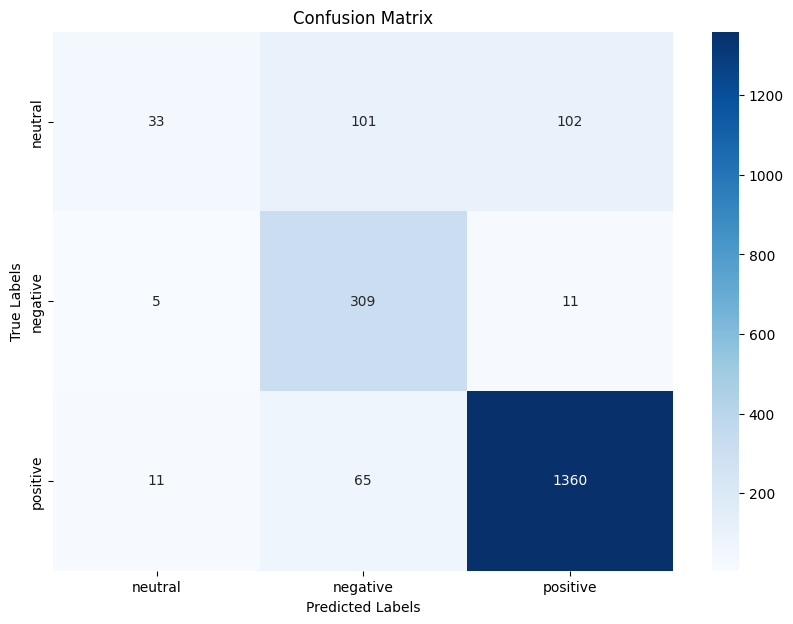

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Gerçek ve tahmin edilen etiketler
true_labels = df['Label']
predicted_labels = df['Predicted']

# Karışıklık matrisi oluştur
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Isı haritası çizdir
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()